## Import Libraries

In [111]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import numpy as np
from datetime import datetime

## Load datasets

In [112]:
# Load all sheets into a dictionary of DataFrames
dfs = pd.read_excel('Accountable_dataset.xlsx', sheet_name=None)

# Load each sheet separately
allMetricsByActiveUser = dfs['allMetricsByActiveUser']
cohorts_ConversionToPaid_DE = dfs['cohorts_ConversionToPaid_DE']

## Inspect the datasets

In [113]:
# Checking unique values in the 'user_id' column
num_unique1 = allMetricsByActiveUser['user_id'].nunique()
num_unique2 = cohorts_ConversionToPaid_DE['user_id'].nunique()
print(f"Number of unique 'user_id' in allMetricsByActiveUser: {num_unique1}")
print(f"Number of unique 'user_id' in cohorts_ConversionToPaid_DE: {num_unique2}")

Number of unique 'user_id' in allMetricsByActiveUser: 40566
Number of unique 'user_id' in cohorts_ConversionToPaid_DE: 50000


In [114]:
# Check for duplicate rows
duplicates_allusers = allMetricsByActiveUser[allMetricsByActiveUser.duplicated(keep=False)]
duplicates_allusers

,user_id,user_email,probably_not_yet_selfemployed,created,created_week,VATtype,accounttype,country,signup_platform,paid,...,signup_os,applanguage,created_AccountableBANKING_account,isVerified_AccountableBANKING,hasTheirAccountableIBANOnInvoices,AccountableBANKING_main_IBAN,municipality,province,region,geo_segment
902,67b7025e0a1e48b824f10b09,ousammatin.photography@gmail.com,0,2025-02-20 10:22:22.644,2025-02-17,franchisee,natural_person_complementary,be,No platform,0,...,Not specified,fr,NaN,NaN,NaT,NaN,Mont-Saint-Guibert,Walloon Brabant,Wallonia,Other
906,67c2bafefc4ee181f59f0a52,gpardoac@gmail.com,0,2025-03-01 07:45:02.813,2025-02-24,exempt,natural_person_principal_no_vat,be,Mobile,0,...,other,fr,NaN,NaN,NaT,NaN,Ixelles,Brussels,Brussels,Brussels
907,67c2bafefc4ee181f59f0a52,gpardoac@gmail.com,0,2025-03-01 07:45:02.813,2025-02-24,exempt,natural_person_principal_no_vat,be,Mobile,0,...,other,fr,NaN,NaN,NaT,NaN,Ixelles,Brussels,Brussels,Brussels
911,67b7025e0a1e48b824f10b09,ousammatin.photography@gmail.com,0,2025-02-20 10:22:22.644,2025-02-17,franchisee,natural_person_complementary,be,No platform,0,...,Not specified,fr,NaN,NaN,NaT,NaN,Mont-Saint-Guibert,Walloon Brabant,Wallonia,Other
1039,67c4b7fafc4ee181f5e56426,issaalchhabi852@gmail.com,0,2025-03-02 19:56:42.990,2025-02-24,franchisee,natural_person_principal_no_vat,be,Mobile,0,...,iOS,en,NaN,NaN,NaT,NaN,Saint-Josse-ten-Noode,Brussels,Brussels,Brussels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,67ad08940f0e56e0118f4587,ma.verkehrsleiter@gmail.com,0,2025-02-12 20:46:13.265,2025-02-10,subjectToVAT,gewerbetreibender_principal,de,Web,0,...,other,de,NaN,NaN,NaT,NaN,Mainz-Kostheim,NaN,Hessen,Other
49925,64d4d025ac9fbd36216f9845,jozsef@szalma.biz,0,2023-08-10 11:55:17.357,2023-08-07,subjectToVAT,freiberufler_complementary,de,No platform,1,...,Not specified,de,NaN,NaN,NaT,NaN,Herzogenaurach,NaN,Bayern,Other
49935,661c08e08e4525962ed53721,wegnermeike15@gmail.com,0,2024-04-14 16:48:32.783,2024-04-08,subjectToVAT,gewerbetreibender_principal,de,Mobile,0,...,android,de,NaN,NaN,NaT,NaN,Schortens,NaN,Niedersachsen,Other
49940,661c08e08e4525962ed53721,wegnermeike15@gmail.com,0,2024-04-14 16:48:32.783,2024-04-08,subjectToVAT,gewerbetreibender_principal,de,Mobile,0,...,android,de,NaN,NaN,NaT,NaN,Schortens,NaN,Niedersachsen,Other


In [115]:
# Remove duplicate rows
allMetrics_2 = allMetricsByActiveUser.drop_duplicates()

# Check if duplicates are removed
num_duplicates_after = allMetrics_2.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")

Number of duplicate rows after removal: 0


In [116]:
# Check for duplicate user IDs (ignoring other columns)
num_duplicate_user_ids = allMetrics_2['user_id'].duplicated().sum()
print(f"Number of duplicate user IDs: {num_duplicate_user_ids}")

Number of duplicate user IDs: 9223


In [117]:
# Find all rows with duplicate 'user_id'
duplicate_user_ids = allMetrics_2[allMetrics_2.duplicated(subset=['user_id'], keep=False)]

# Group by 'user_id'
grouped = duplicate_user_ids.groupby('user_id')

# Identify columns with differing values for each duplicate 'user_id'
columns_with_differences = {}

for user_id, group in grouped:
    # Check if there are differences in any columns
    differing_cols = group.nunique().loc[lambda x: x > 1].index.tolist()
    
    if differing_cols:
        columns_with_differences[user_id] = differing_cols

# Display the results
for user_id, cols in columns_with_differences.items():
    print(f"User ID: {user_id} - Differing Columns: {cols}")

User ID: 5e8d823e4b3da80008b1d376 - Differing Columns: ['municipality']
User ID: 5e9217165e7c640008d8f2f8 - Differing Columns: ['municipality']
User ID: 5ee81aab3797240008c814c1 - Differing Columns: ['municipality']
User ID: 5f4f880f35e3200006216b61 - Differing Columns: ['municipality']
User ID: 5f631215ad97ba0006e1608e - Differing Columns: ['municipality']
User ID: 5f6c6ac20a97d700061a8a1d - Differing Columns: ['municipality']
User ID: 5f9de97154539e00065cbdf5 - Differing Columns: ['municipality']
User ID: 5fae899fd1b03f0006e1e2f2 - Differing Columns: ['municipality']
User ID: 5fae9c74d1b03f0006e1e700 - Differing Columns: ['municipality']
User ID: 5fb631254b6daa0006e2da64 - Differing Columns: ['municipality']
User ID: 5fb6ae844b6daa0006e2ea22 - Differing Columns: ['municipality']
User ID: 5fc6a156f230ad0006303bac - Differing Columns: ['municipality']
User ID: 5fc83605889b690006bf1ee4 - Differing Columns: ['municipality']
User ID: 5fc9183b6feaca0006fbfec0 - Differing Columns: ['municip

In [118]:
# Remove duplicates by keeping only the first occurrence of each user_id
allMetrics_cleaned = allMetrics_2.drop_duplicates(subset='user_id', keep='first')

# Verify if duplicates were removed
duplicates_after_removal = allMetrics_cleaned[allMetrics_cleaned.duplicated(subset=['user_id'], keep=False)]
print(f"Number of duplicates after removal: {duplicates_after_removal.shape[0]}")

Number of duplicates after removal: 0


## Join the datasets

In [119]:
# Perform an inner join on user_id
merged_df = pd.merge(cohorts_ConversionToPaid_DE, allMetrics_cleaned, on='user_id', how='inner')

In [120]:
# Check for duplicate rows after joining
duplicates = merged_df[merged_df.duplicated(keep=False)]
num_duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [121]:
# Check for duplicate columns
def print_x_y_column_contents(df):
    # Get a list of all columns with _x suffix
    columns_x = [col for col in df.columns if col.endswith('_x')]
    columns_y = [col.replace('_x', '_y') for col in columns_x]
    
    # Print columns with _x and corresponding _y columns and their contents
    for col_x, col_y in zip(columns_x, columns_y):
        if col_y in df.columns:
            print(f"Column _x: {col_x}")
            print(f"Contents of {col_x}:")
            print(df[col_x].head(10))  # Print first few rows
            print("="*40)  # Separator line for readability

            print(f"Column _y: {col_y}")
            print(f"Contents of {col_y}:")
            print(df[col_y].head(10))  # Print first few rows
            print("="*40) 
print_x_y_column_contents(merged_df)

Column _x: country_x
Contents of country_x:
0    de
1    de
2    de
3    de
4    de
5    de
6    de
7    de
8    de
9    de
Name: country_x, dtype: object
Column _y: country_y
Contents of country_y:
0    de
1    de
2    de
3    de
4    de
5    de
6    de
7    de
8    de
9    de
Name: country_y, dtype: object
Column _x: created_x
Contents of created_x:
0   2023-06-27 21:01:15
1   2024-03-18 09:57:47
2   2024-03-22 13:32:06
3   2020-04-05 16:07:21
4   2021-12-06 08:41:20
5   2024-08-04 09:01:01
6   2024-09-05 18:45:16
7   2024-12-16 15:50:57
8   2025-01-29 09:51:09
9   2022-11-28 22:46:41
Name: created_x, dtype: datetime64[ns]
Column _y: created_y
Contents of created_y:
0   2023-06-27 21:01:15.132
1   2024-03-18 09:57:46.599
2   2024-03-22 13:32:05.953
3   2020-04-05 16:07:20.876
4   2021-12-06 08:41:20.194
5   2024-08-04 09:01:01.291
6   2024-09-05 18:45:16.020
7   2024-12-16 15:50:56.691
8   2025-01-29 09:51:08.704
9   2022-11-28 22:46:41.309
Name: created_y, dtype: datetime64[ns]
Colu

In [122]:
# Drop the duplicate columns
def drop_y_and_rename_x_columns(df):
    # Get a list of all columns with _y suffix
    columns_y = [col for col in df.columns if col.endswith('_y')]
    
    # Drop the columns with _y suffix
    df_dropped_y = df.drop(columns=columns_y)
    
    # Rename the columns with _x suffix by removing the _x
    df_dropped_y.columns = [col.replace('_x', '') for col in df_dropped_y.columns]
    
    return df_dropped_y

merged_df_cleaned = drop_y_and_rename_x_columns(merged_df)

## Pre-processing & Data Preparation

In [123]:
merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29052 entries, 0 to 29051
Data columns (total 76 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   user_id                                            29052 non-null  object        
 1   country                                            29052 non-null  object        
 2   created                                            29052 non-null  datetime64[ns]
 3   accountType                                        29052 non-null  object        
 4   VATNumber                                          1974 non-null   object        
 5   VATType                                            29052 non-null  object        
 6   startDate                                          2033 non-null   datetime64[ns]
 7   APC1                                               17003 non-null  object        
 8   created_invoice 

### Convert columns to Boolean

In [124]:
# Convert columns to Boolean in allMetricsByActiveUser
columns_to_convert = [
    'created_AccountableBANKING_account', 
    'hasTheirAccountableIBANOnInvoices', 
    'isVerified_AccountableBANKING',
    'has_VATnumber', 
    'has_Steuernummer', 
    'connected_bank', 
    'created_expense', 
    'created_invoice',
    'created_connector',
    'created_other_revenue',
    'created_quote',
    'probably_not_yet_selfemployed'
]

# Loop through the columns and create new boolean columns
for col in columns_to_convert:
    # Check if the column is already a boolean or int type
    if pd.api.types.is_integer_dtype(merged_df_cleaned[col]) or pd.api.types.is_bool_dtype(merged_df_cleaned[col]):
        # Convert to boolean (True=1, False=0)
        merged_df_cleaned[f'{col}_bol'] = merged_df_cleaned[col].astype(bool).astype(int)
    else:
        # Replace 0 with NaN and then convert to boolean (True=non-NaN, False=NaN)
        merged_df_cleaned[f'{col}_bol'] = merged_df_cleaned[col].notna().astype(int)

# Check the first few rows to confirm the changes
merged_df_cleaned.head()

,user_id,country,created,accountType,VATNumber,VATType,startDate,APC1,created_invoice,created_quote,...,isVerified_AccountableBANKING_bol,has_VATnumber_bol,has_Steuernummer_bol,connected_bank_bol,created_expense_bol,created_invoice_bol,created_connector_bol,created_other_revenue_bol,created_quote_bol,probably_not_yet_selfemployed_bol
0,649b4e1b8d350df5b7651700,de,2023-06-27 21:01:15,freiberufler_complementary,NaN,franchisee,2020-09-11,NaN,2024-10-24 09:07:28,NaT,...,0,0,1,1,1,1,1,0,0,0
1,65f8101a4eb59806a21825a5,de,2024-03-18 09:57:47,freiberufler_complementary,NaN,franchisee,NaT,NaN,2024-06-01 14:11:15,NaT,...,0,0,1,0,1,1,0,0,0,0
2,65fd8855741632ef24d2fee2,de,2024-03-22 13:32:06,freiberufler_complementary,NaN,franchisee,NaT,NaN,2024-08-13 13:24:58,NaT,...,0,0,1,1,1,1,1,1,0,0
3,5e8a0238777bef000800624f,de,2020-04-05 16:07:21,freiberufler_complementary,NaN,franchisee,NaT,NaN,NaT,NaT,...,0,0,0,0,1,0,0,0,0,0
4,61adccb04fd81d000653d3bc,de,2021-12-06 08:41:20,freiberufler_principal_no_vat,NaN,exempt,NaT,NaN,NaT,NaT,...,0,0,0,0,1,0,0,0,0,0


### Handle missing values

In [139]:
# Check unique values
print(merged_df_cleaned['APC1'].unique())
print(merged_df_cleaned['signup_platform'].unique())

[nan 'accountants_and_tax_advisors' 'animal_workers'
 'artists_and_content_creators' 'business_consultants' 'car_dealers'
 'coaches' 'construction_professionals' 'copywriters' 'designers'
 'drivers_and_courriers' 'e-commerce_professionals' 'engineers'
 'finance_professionals' 'food_workers' 'gardeners'
 'hair_and_beauty_workers' 'hospitality_professionals'
 'interpreters_and_translators' 'it_professionals' 'journalists'
 'maintenance_workers' 'marketing_professionals' 'mechanics'
 'media_producers' 'mental_health_professionals' 'metal_workers'
 'paramedical_workers' 'photographers' 'photovoltaic_system_owners'
 'real_estate_professionals' 'retailers' 'security_professionals'
 'sports_professionals' 'tailors' 'teachers' 'trade_representatives'
 'tradesmen' 'warehousing_and_transport_professionals'
 'agricultural_workers' 'dentists' 'doctors' 'handymen'
 'household_helpers' 'masseur' 'office_support_professionals' 'craftsmen'
 'elderly_care_professionals' 'legal_professionals'
 'event_in

In [140]:
# Fill NaN with 0
merged_df_cleaned['APC1'] = merged_df_cleaned['APC1'].fillna(0)

# Fill NaN with 'Not specified' and 'Not found' with 'Not specified'
merged_df_cleaned['signup_platform'] = merged_df_cleaned['signup_platform'].fillna('Not specified').replace('Not found', 'Not specified')

### Identify Converted and Non-Converted users

In [141]:
converted_users = merged_df_cleaned[merged_df_cleaned['firstSubscriptionDate'].notna()]
non_converted_users = merged_df_cleaned[merged_df_cleaned['firstSubscriptionDate'].isna()]

# Count the number of Converted and Non-converted users
converted_count = len(converted_users)
non_converted_count = len(non_converted_users)
total_count = converted_count + non_converted_count

# Calculate percentages
converted_percentage = (converted_count / total_count) * 100
non_converted_percentage = (non_converted_count / total_count) * 100

# Create a DataFrame
comparison_df = pd.DataFrame({
    'User Group': ['Converted', 'Non-Converted'],
    'Count': [converted_count, non_converted_count],
    'Percentage': [converted_percentage, non_converted_percentage]
})
comparison_df['Percentage'] = comparison_df['Percentage'].apply(lambda x: f"{round(x, 2)}%")
comparison_df

,User Group,Count,Percentage
0,Converted,4377,15.07%
1,Non-Converted,24675,84.93%


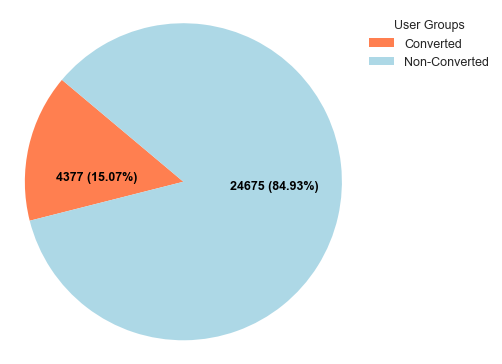

In [142]:
# Create labels for the pie chart
labels = ['Converted', 'Non-Converted']
sizes = [converted_count, non_converted_count]
percentages = [converted_percentage, non_converted_percentage]

# Create data labels with counts and percentages
data_labels = [f'{sizes[i]} ({percentages[i]:.2f}%)' for i in range(len(labels))]

# Colors for the pie chart
colors = ['coral', 'lightblue']

# Create the pie chart
plt.figure(figsize=(5, 5))
wedges, texts = plt.pie(sizes, colors=colors, startangle=140)  

plt.axis('equal') 
plt.legend(wedges, labels, title="User Groups", loc="upper left", bbox_to_anchor=(1, 1))

# Add the data labels
plt.setp(texts, size=10, weight="bold", color='black')
plt.setp(texts, ha='center', va='center')
plt.setp(texts, rotation_mode='anchor')

for text, label, wedge in zip(texts, data_labels, wedges):
    ang = (wedge.theta1 + wedge.theta2) / 2.
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    verticalalignment = {-1: "bottom", 1: "top"}[int(np.sign(y))]
    distance = 0.3 
    text.set_position((x * distance, y * distance))
    text.set_text(label)
    text.set_horizontalalignment(horizontalalignment)
    text.set_verticalalignment(verticalalignment)

plt.show()

#### ** Export the cleaned dataset to csv **

In [143]:
# Create a copy of the original DataFrame
df_with_conversion_status = merged_df_cleaned.copy()

# Add a new column 'Conversion_Status' based on whether 'firstSubscriptionDate' is present or not
df_with_conversion_status['Conversion_Status'] = np.where(
    df_with_conversion_status['firstSubscriptionDate'].notna(), 'Converted', 'Non-converted'
)

# Export the cleaned dataset to csv:
df_with_conversion_status.to_csv('Accountable_cleaned.csv', index=False)

# 📊 User Behaviour Analysis 📊

## Engagement Metrics

In [135]:
# Total Sessions per User
average_sessions = merged_df_cleaned['total_num_sessions'].mean()

# Average Session Duration (time spent per session)
merged_df_cleaned['average_session_duration'] = merged_df_cleaned['w1_minutes_inapp'] / merged_df_cleaned['total_num_sessions']
average_session_duration = merged_df_cleaned['average_session_duration'].mean()

# Feature Usage Rate (Invoice, Expense, etc.)
invoice_usage_rate = merged_df_cleaned['created_invoice_bol'].mean() * 100
expense_usage_rate = (merged_df_cleaned['created_expense_bol'] > 0).mean() * 100

# Days Active in the First Week (Retention Metric)
average_days_active = merged_df_cleaned['w01_daysUsed'].mean()

#  Banking Integration Rate
banking_integration_rate = merged_df_cleaned['connected_bank_bol'].mean() * 100

# Conversion Rate
conversion_rate = (converted_count / len(merged_df_cleaned)) * 100

# Print all results
print(f"Average Total Sessions per User: {average_sessions:.2f}")
print(f"Average Session Duration per User: {average_session_duration:.2f} minutes")
print(f"Invoice Usage Rate: {invoice_usage_rate:.2f}%")
print(f"Expense Usage Rate: {expense_usage_rate:.2f}%")
print(f"Average Days Active in First Week: {average_days_active:.2f}")
print(f"Banking Integration Rate: {banking_integration_rate:.2f}%")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Average Total Sessions per User: 19.10
Average Session Duration per User: 0.05 minutes
Invoice Usage Rate: 34.79%
Expense Usage Rate: 63.93%
Average Days Active in First Week: 1.03
Banking Integration Rate: 25.89%
Conversion Rate: 15.07%


## Comparison of Engagement Metrics between Converted and Non-converted Users

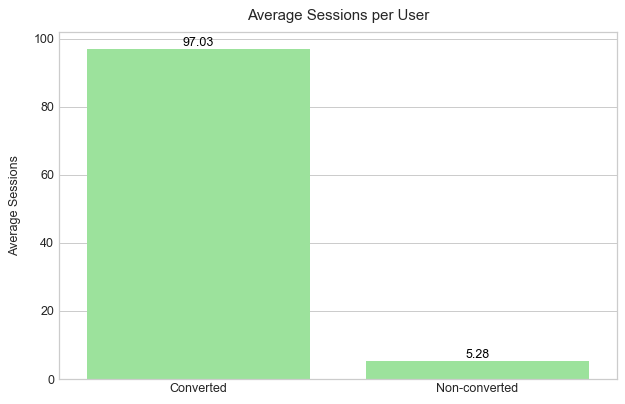

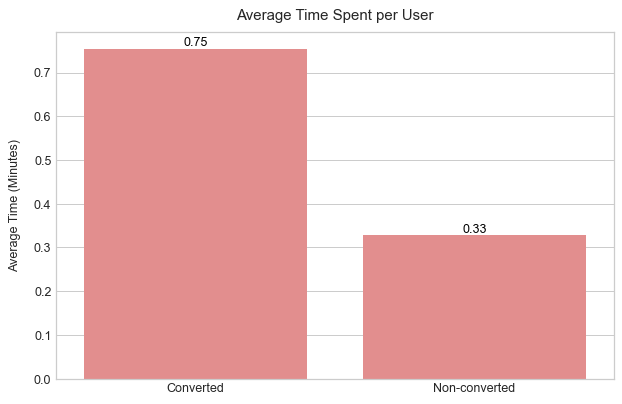

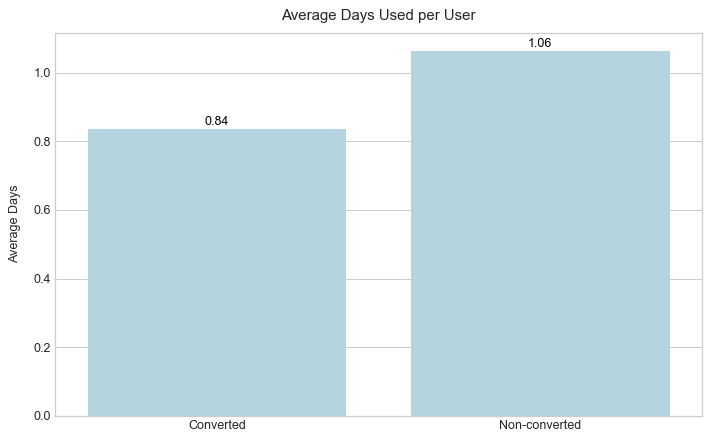

In [97]:
# Average sessions per user
avg_sessions_data = pd.DataFrame({
    'user_group': ['Converted', 'Non-converted'],
    'avg_sessions': [
        converted_users['total_num_sessions'].mean(),
        non_converted_users['total_num_sessions'].mean()
    ]
})

# Average time spent per user
avg_time_spent_data = pd.DataFrame({
    'user_group': ['Converted', 'Non-converted'],
    'avg_time_spent': [
        converted_users['w1_minutes_inapp'].mean(),
        non_converted_users['w1_minutes_inapp'].mean()
    ]
})

# Average days used per user
avg_days_used_data = pd.DataFrame({
    'user_group': ['Converted', 'Non-converted'],
    'avg_days_used': [
        converted_users['w01_daysUsed'].mean(),
        non_converted_users['w01_daysUsed'].mean()
    ]
})

# Consistent size for each plot
plot_size = (8, 5)

# Create individual plots (no columns)
fig1, ax1 = plt.subplots(figsize=plot_size)
sns.barplot(x='user_group', y='avg_sessions', color='lightgreen', data=avg_sessions_data, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
ax1.set_title('Average Sessions per User', pad=10)
ax1.set_ylabel('Average Sessions', labelpad=10)
ax1.set_xlabel('')

fig2, ax2 = plt.subplots(figsize=plot_size)
sns.barplot(x='user_group', y='avg_time_spent', color='lightcoral', data=avg_time_spent_data, ax=ax2)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
ax2.set_title('Average Time Spent per User', pad=10)
ax2.set_ylabel('Average Time (Minutes)', labelpad=10)
ax2.set_xlabel('')

fig3, ax3 = plt.subplots(figsize=plot_size)
sns.barplot(x='user_group', y='avg_days_used', color='lightblue', data=avg_days_used_data, ax=ax3)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
ax3.set_title('Average Days Used per User', pad=10)
ax3.set_ylabel('Average Days', labelpad=10)
ax3.set_xlabel('')

# Tight layout for individual plots
plt.tight_layout(h_pad=5, w_pad=3)
plt.show()

## Boolean features comparison between Converted and Non-converted users

<Figure size 1080x1440 with 0 Axes>

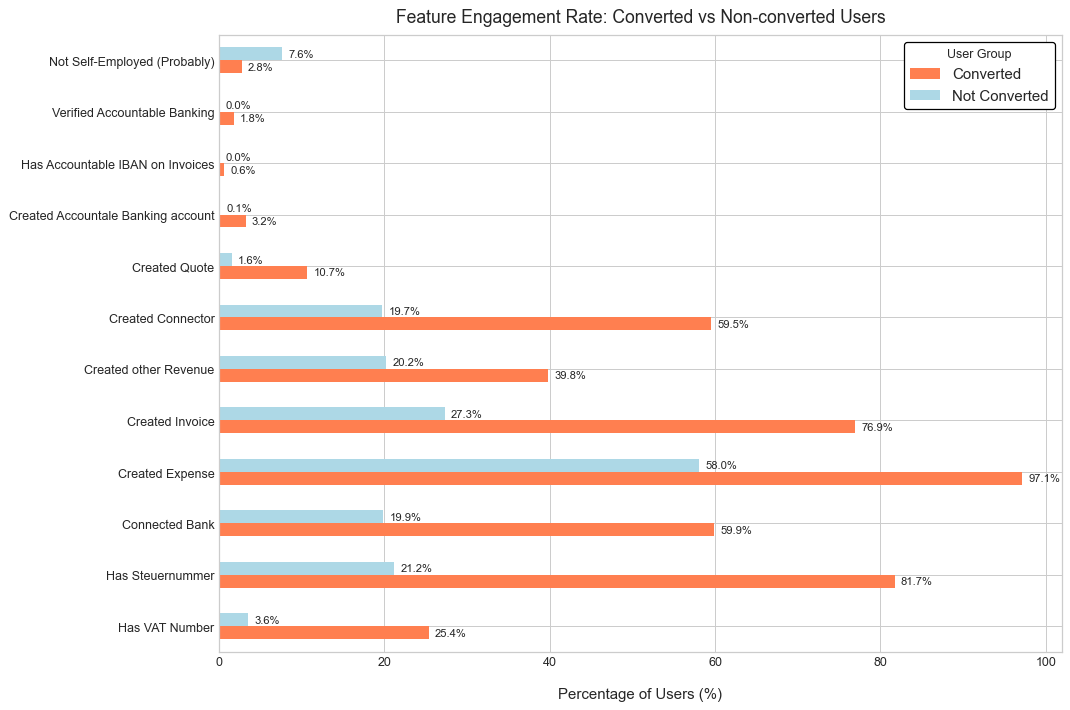

In [107]:
boolean_features = [
    'has_VATnumber_bol', 'has_Steuernummer_bol', 'connected_bank_bol', 
    'created_expense_bol', 'created_invoice_bol', 'created_other_revenue_bol',
    'created_connector_bol', 'created_quote_bol', 'created_AccountableBANKING_account_bol', 
    'hasTheirAccountableIBANOnInvoices_bol', 
    'isVerified_AccountableBANKING_bol',
    'probably_not_yet_selfemployed_bol'
]

# Calculate percentage of users with each feature
converted_percentages = converted_users[boolean_features].mean() * 100
non_converted_percentages = non_converted_users[boolean_features].mean() * 100

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Converted': converted_percentages,
    'Not Converted': non_converted_percentages
})

# Rename the index for better readability
better_names = {
    'has_VATnumber_bol': 'Has VAT Number',
    'has_Steuernummer_bol': 'Has Steuernummer',
    'connected_bank_bol': 'Connected Bank',
    'created_expense_bol': 'Created Expense',
    'created_invoice_bol': 'Created Invoice',
    'created_other_revenue_bol': 'Created other Revenue',
    'created_connector_bol': 'Created Connector',
    'created_quote_bol': 'Created Quote',
    'created_AccountableBANKING_account_bol': "Created Accountale Banking account", 
    'hasTheirAccountableIBANOnInvoices_bol': "Has Accountable IBAN on Invoices", 
    'isVerified_AccountableBANKING_bol': "Verified Accountable Banking",
    'probably_not_yet_selfemployed_bol': "Not Self-Employed (Probably)"
}
comparison_df.index = [better_names[col] for col in comparison_df.index]

# Plot the boolean feature comparison chart
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 90

plt.figure(figsize=(12, 16))
colors = ['coral', 'lightblue']
ax = comparison_df.plot(kind='barh', color=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' for v in container.datavalues], padding=5, fontsize=9)

# Title and labels
plt.title('Feature Engagement Rate: Converted vs Non-converted Users', fontsize=14, pad=10)
plt.xlabel('Percentage of Users (%)', fontsize=12, labelpad=15)
plt.ylabel('', fontsize=12)
plt.legend(title='User Group', frameon=True, facecolor='white', edgecolor='black', fontsize=12, framealpha=1)
plt.tight_layout()

plt.show()

## Profession by Converted and Non-converted users

In [102]:
apc1_counts = pd.DataFrame({
    'Converted': converted_users['APC1'].value_counts(),
    'Non-converted': non_converted_users['APC1'].value_counts()
}).fillna(0)

# Replace underscores with spaces in the index
apc1_counts.index = apc1_counts.index.str.replace('_', ' ')

# Create a table with counts for each profession and sort it by the number of converted users
apc1_table = pd.DataFrame({
    'Converted Users': apc1_counts['Converted'].astype(int),
    'Non-Converted Users': apc1_counts['Non-converted'].astype(int),
})

apc1_table_sorted = apc1_table.sort_values(by='Converted Users', ascending=False)
apc1_table_sorted

,Converted Users,Non-Converted Users
APC1,,
artists and content creators,467,2004
designers,315,1144
it professionals,305,1116
business consultants,197,965
coaches,164,762
photographers,122,433
e-commerce professionals,122,478
marketing professionals,121,378
teachers,96,516


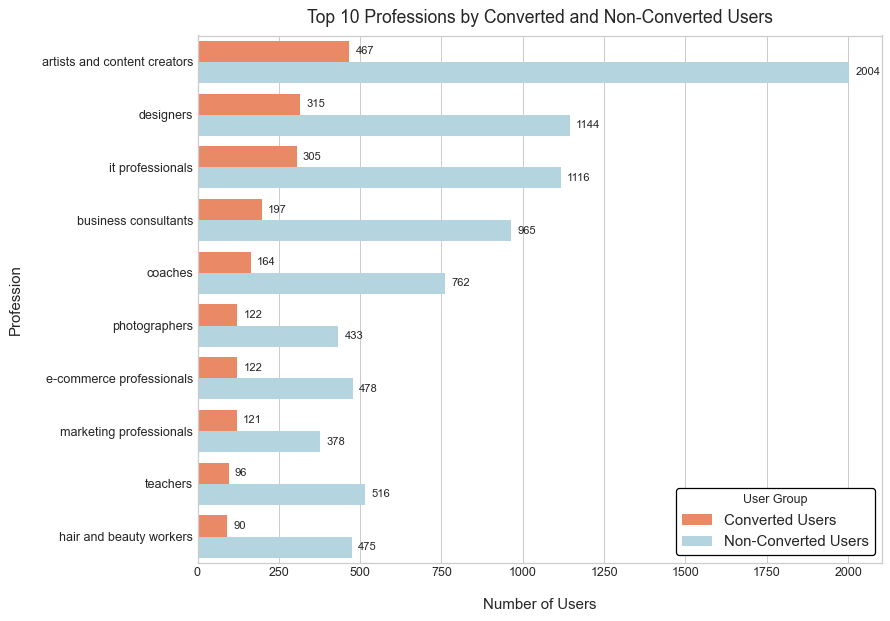

In [103]:
# Sort the table by 'Converted Users' and take the top n professions
top_apc1 = apc1_table_sorted.head(10)

# Create a new DataFrame for plotting
top_apc1_melted = top_apc1.reset_index().melt(id_vars='APC1', value_vars=['Converted Users', 'Non-Converted Users'],
                                                    var_name='User Group', value_name='Count')

# Create bar chart
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Count', y='APC1', hue='User Group', data=top_apc1_melted, palette=['coral', 'lightblue'])

plt.title('Top 10 Professions by Converted and Non-Converted Users', fontsize=14, pad=10)
plt.xlabel('Number of Users', fontsize=12, labelpad=15)
plt.ylabel('Profession', fontsize=12, labelpad=15)
plt.legend(title='User Group', frameon=True, facecolor='white', edgecolor='black', fontsize=12, framealpha=1)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v)}' for v in container.datavalues], padding=5, fontsize=9)

plt.tight_layout()
plt.show()

## VAT type by Converted and Non-converted users

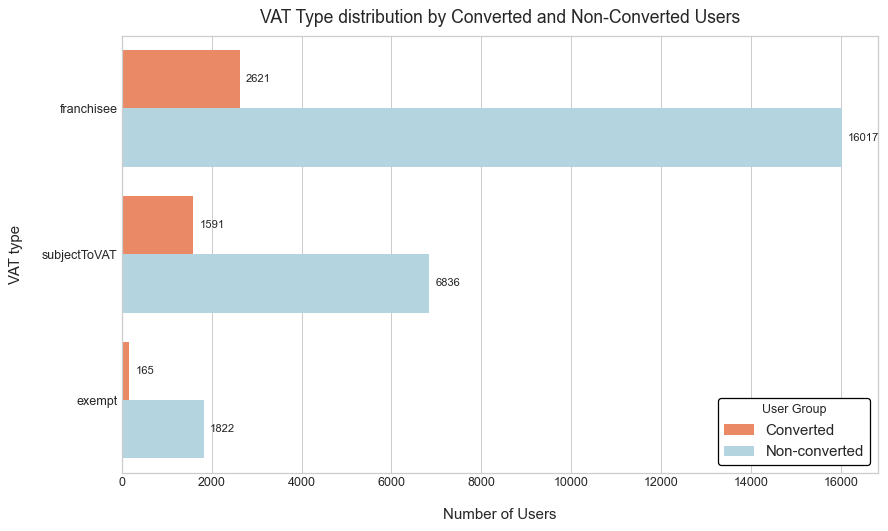

In [105]:
# Generate VAT counts for Converted and Non-Converted users
VAT_counts = pd.DataFrame({
    'Converted': converted_users['VATType'].value_counts(),
    'Non-converted': non_converted_users['VATType'].value_counts()
}).fillna(0)

# Convert counts to integers
VAT_counts['Converted'] = VAT_counts['Converted'].astype(int)
VAT_counts['Non-converted'] = VAT_counts['Non-converted'].astype(int)

# Prepare data for plotting without resetting index
VAT_table_plot = VAT_counts.melt(ignore_index=False, var_name='User Group', value_name='Count')
VAT_table_plot.index.name = 'VAT Type'
VAT_table_plot = VAT_table_plot.reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='VAT Type', hue='User Group', data=VAT_table_plot, palette=['coral', 'lightblue'])

# Add titles and labels
plt.title('VAT Type distribution by Converted and Non-Converted Users', fontsize=14, pad=10)
plt.xlabel('Number of Users', fontsize=12, labelpad=15)
plt.ylabel('VAT type', fontsize=12, labelpad=15)
plt.legend(title='User Group', frameon=True, facecolor='white', edgecolor='black', fontsize=12, framealpha=1)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v)}' for v in container.datavalues], padding=5, fontsize=9)

plt.tight_layout()
plt.show()

## Account type by Converted and Non-converted users

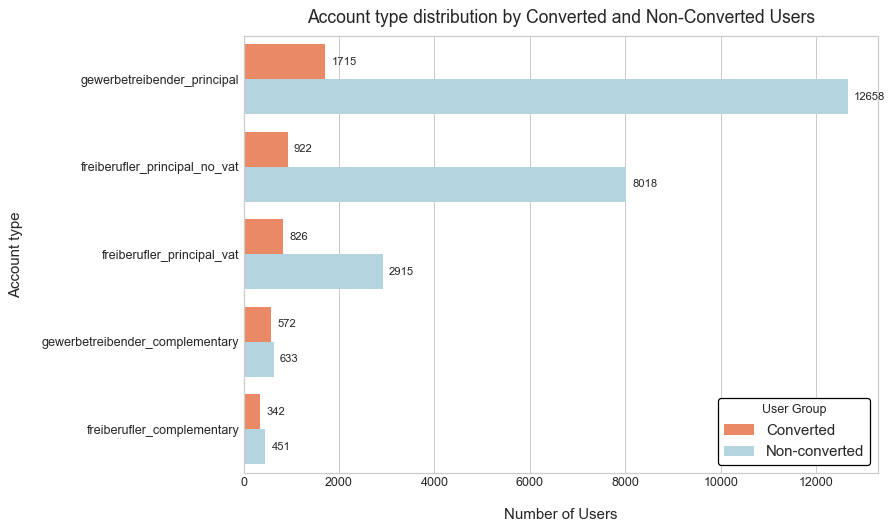

In [106]:
# Generate Account type counts for Converted and Non-Converted users
account_counts = pd.DataFrame({
    'Converted': converted_users['accounttype'].value_counts(),
    'Non-converted': non_converted_users['accounttype'].value_counts()
}).fillna(0)

# Convert counts to integers
account_counts['Converted'] = account_counts['Converted'].astype(int)
account_counts['Non-converted'] = account_counts['Non-converted'].astype(int)

# Prepare data for plotting without resetting index
account_table_plot = account_counts.melt(ignore_index=False, var_name='User Group', value_name='Count')
account_table_plot.index.name = 'VAT Type'
account_table_plot = account_table_plot.reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='VAT Type', hue='User Group', data=account_table_plot, palette=['coral', 'lightblue'])

# Add titles and labels
plt.title('Account type distribution by Converted and Non-Converted Users', fontsize=14, pad=10)
plt.xlabel('Number of Users', fontsize=12, labelpad=15)
plt.ylabel('Account type', fontsize=12, labelpad=15)
plt.legend(title='User Group', frameon=True, facecolor='white', edgecolor='black', fontsize=12, framealpha=1)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v)}' for v in container.datavalues], padding=5, fontsize=9)

plt.tight_layout()
plt.show()